# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sma
import statsmodels.formula.api as sfa
import statsmodels.stats.api as ssa
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.stattools import durbin_watson


from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import warnings
warnings.filterwarnings('ignore')

# 2. Collect and load data

In [2]:
bigcity = pd.read_csv('bigcity.csv',index_col=0)
bigcity.head()

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


# 3. Explore numeric variables - five number summary

In [3]:
bigcity.describe().T

,count,mean,std,min,25%,50%,75%,max
u,49.0,103.142857,104.405061,2.0,43.0,64.0,120.0,507.0
x,49.0,127.795918,123.121211,46.0,58.0,79.0,130.0,634.0


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

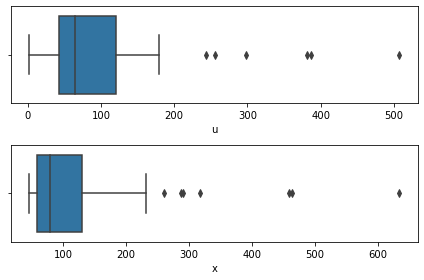

In [4]:
t =1
for i in bigcity.columns:
    plt.subplot(2,1,t)
    sns.boxplot(bigcity[i])
    plt.xlabel(i)
    t+=1
plt.tight_layout()
plt.show()

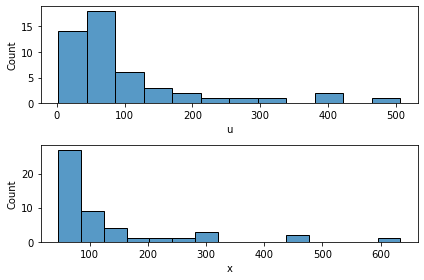

In [5]:
t =1
for i in bigcity.columns:
    plt.subplot(2,1,t)
    sns.histplot(bigcity[i])
    plt.xlabel(i)
    t+=1
plt.tight_layout()
plt.show()

In [6]:
umean = np.mean(bigcity.u)
xmean = np.mean(bigcity.x)
n = 49

uvariance = np.sqrt(np.sum(bigcity.u - umean))/n-1
xvariance = np.sqrt(np.abs(np.sum(bigcity.x - xmean)))/n-1

print('Varaince of u: ',uvariance)
print('Varaince of x: ',xvariance)
print('STD of u: ',np.std(bigcity.u))
print('STD of x: ',np.std(bigcity.x))

Varaince of u:  -0.9999999854029441
Varaince of x:  -0.9999999927014721
STD of u:  103.33421110006823
STD of x:  121.85839550383406


In [7]:
stats.mannwhitneyu(bigcity.u,bigcity.x)

MannwhitneyuResult(statistic=896.0, pvalue=0.030748859631364867)

In [8]:
stats.levene(bigcity.u,bigcity.x)

LeveneResult(statistic=0.11601269636462035, pvalue=0.7341441747778426)

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

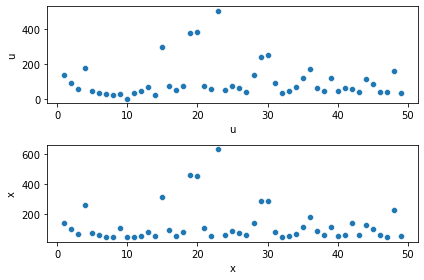

In [9]:

t =1
for i in bigcity.columns:
    plt.subplot(2,1,t)
    sns.scatterplot(bigcity.index,bigcity[i])
    plt.xlabel(i)
    t+=1
plt.tight_layout()
plt.show()

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [10]:
X = bigcity.u
y = bigcity.x

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [11]:
bigcity.isna().sum(),bigcity.corr()

(u    0
 x    0
 dtype: int64,
           u         x
 u  1.000000  0.981742
 x  0.981742  1.000000)

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [12]:
xtrain, xtest, ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=1)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((39,), (10,), (39,), (10,))

In [13]:
model = sfa.ols('x~u',data=bigcity).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1252.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.57e-35
Time:                        19:32:55   Log-Likelihood:                -223.55
No. Observations:                  49   AIC:                             451.1
Df Residuals:                      47   BIC:                             454.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3840      4.777      1.755      0.086      -1.226      17.994
u              1.1577      0.033     35.383      0.000       1.092       1.224
==============================================================================
Omnibus:                       12.819   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.429
Skew:                           1.084   Prob(JB):                      0.00121
Kurtosis:                       4.369   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
x_train = sma.add_constant(xtrain)
x_test = sma.add_constant(xtest)
ModelOLS = sma.OLS(ytrain,x_train).fit()
ModelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1127.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           2.58e-29
Time:                        19:37:51   Log-Likelihood:                -177.94
No. Observations:                  39   AIC:                             359.9
Df Residuals:                      37   BIC:                             363.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7185      5.231      1.858      0.071      -0.881      20.318
u              1.1595      0.035     33.573      0.000       1.089       1.229
==============================================================================
Omnibus:                       12.712   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.946
Skew:                           1.171   Prob(JB):                      0.00154
Kurtosis:                       4.577   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [16]:
model.params

Intercept    8.383956
u            1.157734
dtype: float64

In [18]:
lr= LinearRegression()
xtrain = pd.DataFrame(xtrain)
xtest = pd.DataFrame(xtest)
ytrain = pd.DataFrame(ytrain)
ytest = pd.DataFrame(ytest)
predtrain = lr.fit(xtrain,ytrain).predict(xtrain)
yhat = lr.fit(xtrain,ytrain).predict(xtest)

In [20]:
lr.coef_,lr.intercept_

(array([[1.15945123]]), array([9.71845532]))

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

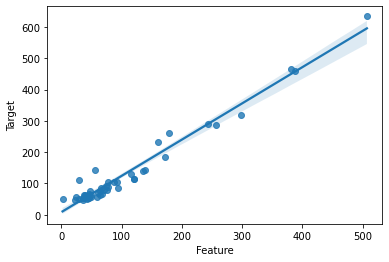

In [21]:
sns.regplot(bigcity.u,bigcity.x)
plt.ylabel('Target')
plt.xlabel('Feature')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [22]:
r2 = r2_score(ytest,yhat)
rmse = np.sqrt(mean_squared_error(ytest,yhat))

print('R Squared: ',r2)
print('RMSE: ',rmse)

R Squared:  0.9181922560396981
RMSE:  23.385235190249123


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [27]:
Train_r2 = r2_score(ytrain,predtrain)
Train_rmse = np.sqrt(mean_squared_error(ytrain,predtrain))
print('Train R Squared: ',Train_r2)
print('Train RMSE: ',Train_rmse)

Test_r2 = r2_score(ytest,yhat)
Test_rmse = np.sqrt(mean_squared_error(ytest,yhat))
print('Test R Squared: ',Test_r2)
print('Test RMSE: ',Test_rmse)

Train R Squared:  0.9682175540860046
Train RMSE:  23.18943724391406
Test R Squared:  0.9181922560396981
Test RMSE:  23.385235190249123


In [28]:
lr.score(xtrain,ytrain)

0.9682175540860046

In [29]:
lr.score(xtest,ytest)

0.9181922560396981